In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/employeesdataset/Employee-Management-Data-for-Analysis.xlsx
/kaggle/input/employeesdata/Employee-Management-Data-for-Analysis.csv


In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('/kaggle/input/employeesdata/Employee-Management-Data-for-Analysis.csv', header=4)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Employee ID          40 non-null     object
 1   Full Name            40 non-null     object
 2   Department           40 non-null     object
 3   Designation          40 non-null     object
 4   Hire Date            40 non-null     object
 5   Annual Salary (USD)  40 non-null     int64 
dtypes: int64(1), object(5)
memory usage: 2.0+ KB


Here we load the .csv file which excludes the 0th column

# A look at the dataset and the features..

In [5]:
file_path="/kaggle/input/employeesdataset/Employee-Management-Data-for-Analysis.xlsx"
df_1=pd.read_excel(file_path, header=5)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           0 non-null      float64       
 1   Employee ID          40 non-null     object        
 2   Full Name            40 non-null     object        
 3   Department           40 non-null     object        
 4   Designation          40 non-null     object        
 5   Hire Date            40 non-null     datetime64[ns]
 6   Annual Salary (USD)  40 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 2.3+ KB


While here we load the .xlsx file which also includes the 0th column, and gives us all the 40 rows for each of the features

In [6]:
print(df.shape)
print(df_1.shape)

(40, 6)
(40, 7)


In [7]:
df_1.describe()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Unnamed: 0,Hire Date,Annual Salary (USD)
count,0.0,40,40.000000
mean,NaN,2023-07-10 13:12:00,55150.000000
min,NaN,2023-01-17 00:00:00,40000.000000
25%,NaN,2023-04-25 12:00:00,48000.000000
50%,NaN,2023-07-11 00:00:00,53500.000000
75%,NaN,2023-09-22 12:00:00,62750.000000
max,NaN,2023-12-03 00:00:00,75000.000000
std,NaN,NaN,10654.359888


In [8]:
df_1.sample(5)

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Unnamed: 0,Employee ID,Full Name,Department,Designation,Hire Date,Annual Salary (USD)
11,NaN,S1012,Melissa Lopez,Marketing,Marketing Manager,2023-06-10,65000
14,NaN,S1015,Matthew Wilson,Information Technology,IT Manager,2023-08-08,75000
10,NaN,S1011,William Hernandez,Human Resources,HR Coordinator,2023-09-01,48000
36,NaN,S1037,Daniel Davis,Customer Service,Customer Service Associate,2023-04-06,40000
9,NaN,S1010,Kimberly Garcia,Quality Assurance,QA Analyst,2023-02-14,56000


In [9]:
df_1['Department'].value_counts()

Department
Human Resources             4
Marketing                   4
Finance                     4
Sales                       4
Information Technology      4
Operations                  4
Customer Service            4
Research and Development    4
Production                  4
Quality Assurance           4
Name: count, dtype: int64

In [10]:
mean_salary=df_1['Annual Salary (USD)'].mean()
print("Mean Salary:", mean_salary)

Mean Salary: 55150.0


In [11]:
median_salary=df_1['Annual Salary (USD)'].median()
print("Median Salary:", median_salary)

Median Salary: 53500.0


In [12]:
q1_salary=df_1['Annual Salary (USD)'].quantile(0.25)
q3_salary=df_1['Annual Salary (USD)'].quantile(0.75)

print("1st Quartile:",q1_salary)
print("3rd Quartile:",q3_salary)

1st Quartile: 48000.0
3rd Quartile: 62750.0


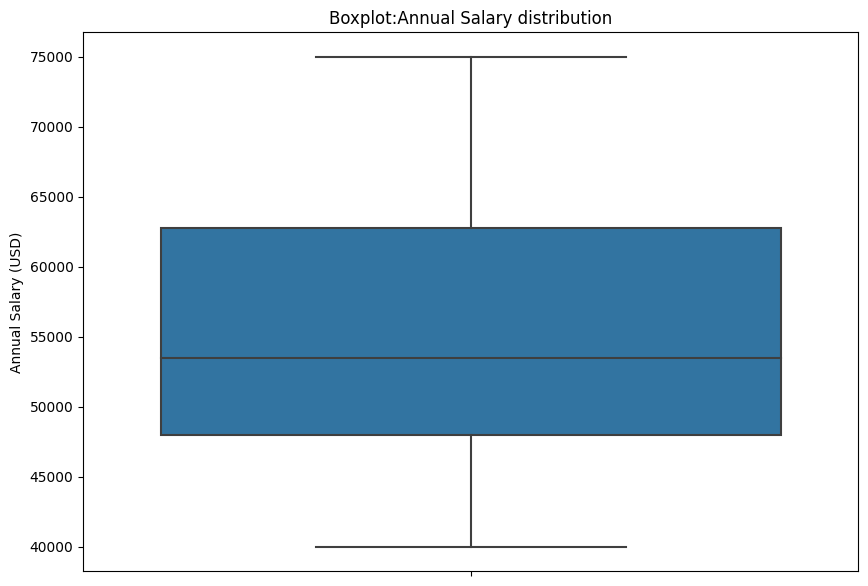

In [13]:
plt.figure(figsize=(10,7))
sns.boxplot(y=df_1['Annual Salary (USD)'])
plt.title("Boxplot:Annual Salary distribution")
plt.show()

In [14]:
mode_salary=df_1['Annual Salary (USD)'].mode()[0]
print("Mode Salary:", mode_salary)

Mode Salary: 48000


**Here it can be commented that Mean Salary > Median Salary > Mode Salary**

In [15]:
std_salary=df_1['Annual Salary (USD)'].std()
print("Standard Deviation of Annual Salary:", std_salary)

Standard Deviation of Annual Salary: 10654.35988764152


# Here's a complete overview of all the key parameters

In [16]:
print(df_1['Annual Salary (USD)'].describe())
print(df_1['Annual Salary (USD)'].value_counts())

count       40.000000
mean     55150.000000
std      10654.359888
min      40000.000000
25%      48000.000000
50%      53500.000000
75%      62750.000000
max      75000.000000
Name: Annual Salary (USD), dtype: float64
Annual Salary (USD)
48000    7
42000    5
60000    4
50000    4
55000    3
70000    3
65000    2
72000    2
75000    2
40000    2
45000    1
58000    1
52000    1
56000    1
68000    1
62000    1
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


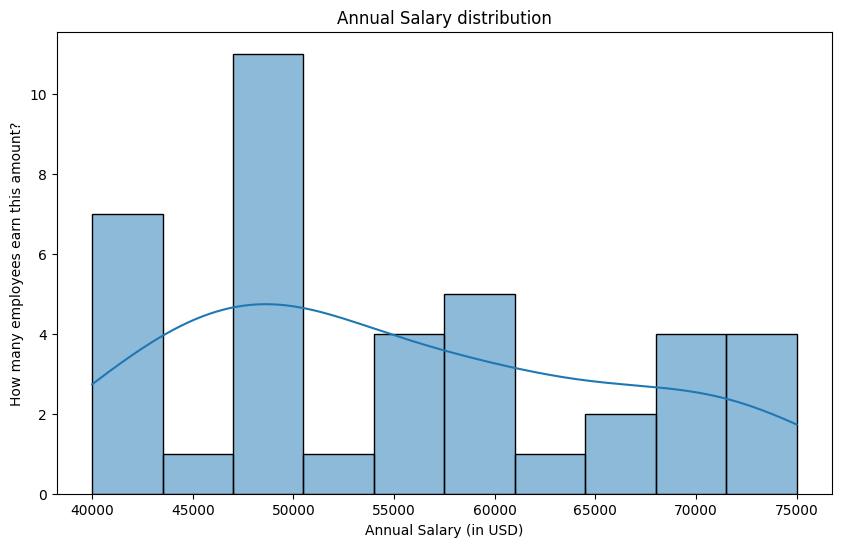

In [17]:
plt.figure(figsize=(10,6))
sns.histplot(df_1['Annual Salary (USD)'], bins=10, kde=True)
plt.title("Annual Salary distribution")
plt.xlabel("Annual Salary (in USD)")
plt.ylabel('How many employees earn this amount?')
plt.show()

/tmp/ipykernel_36/3324227808.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Department', y='Annual Salary (USD)', data=df_1, estimator="mean", ci=None)


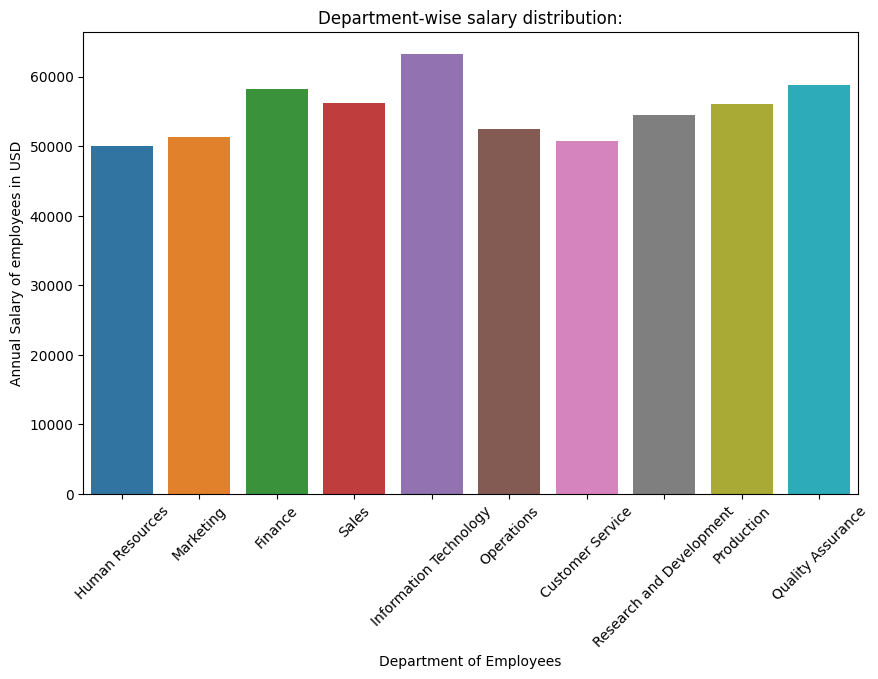

In [18]:
plt.figure(figsize=(10,6))
sns.barplot(x='Department', y='Annual Salary (USD)', data=df_1, estimator="mean", ci=None)
plt.title("Department-wise salary distribution:")
plt.xlabel("Department of Employees")
plt.ylabel('Annual Salary of employees in USD')
plt.xticks(rotation=45)
plt.show()

From the above plot, we can infer that:

* Information Technology (IT) dept. employees have the highest Annual Salary out of all, while Finance and Quality Assurance follow closely behind.

* Human Resources (HR) dept. offers lowest salary to its employees as per the plot, while Customer Service & Marketing are just a little ahead.

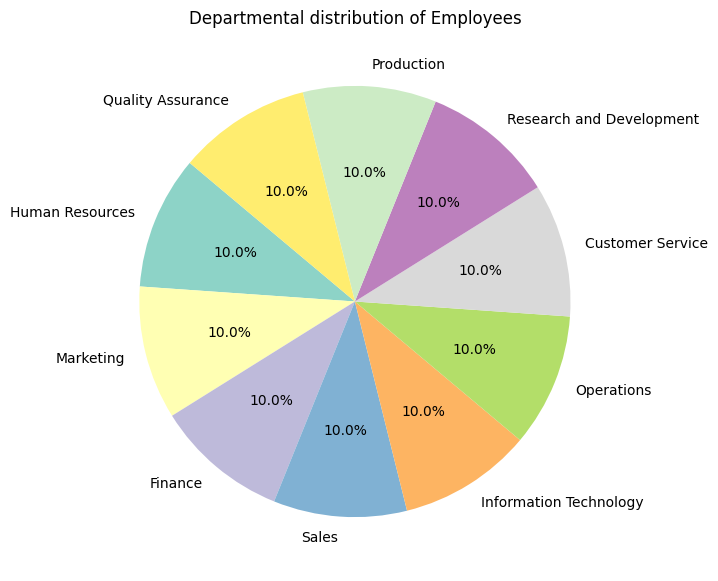

In [19]:
plt.figure(figsize=(10,7))
df_1['Department'].value_counts().plot.pie(autopct="%1.1f%%", startangle=140, cmap="Set3")
plt.title("Departmental distribution of Employees")
plt.ylabel("")
plt.show()


In [20]:
df_1['Hire Year']=df_1['Hire Date'].dt.year
print(df_1['Hire Year'].info())
print(df_1['Hire Year'].value_counts())

<class 'pandas.core.series.Series'>
RangeIndex: 40 entries, 0 to 39
Series name: Hire Year
Non-Null Count  Dtype
--------------  -----
40 non-null     int32
dtypes: int32(1)
memory usage: 292.0 bytes
None
Hire Year
2023    40
Name: count, dtype: int64


Since all the employees have been hired in the year 2023, this feature will not offer much information, so we get into months.

In [21]:
df_1['Hire Month']=df_1['Hire Date'].dt.month
print(df_1['Hire Month'].info())
#print(df_1['Hire Month'].value_counts())

<class 'pandas.core.series.Series'>
RangeIndex: 40 entries, 0 to 39
Series name: Hire Month
Non-Null Count  Dtype
--------------  -----
40 non-null     int32
dtypes: int32(1)
memory usage: 292.0 bytes
None


# This is how our dataset looks now..

In [22]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Unnamed: 0           0 non-null      float64       
 1   Employee ID          40 non-null     object        
 2   Full Name            40 non-null     object        
 3   Department           40 non-null     object        
 4   Designation          40 non-null     object        
 5   Hire Date            40 non-null     datetime64[ns]
 6   Annual Salary (USD)  40 non-null     int64         
 7   Hire Year            40 non-null     int32         
 8   Hire Month           40 non-null     int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(4)
memory usage: 2.6+ KB


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


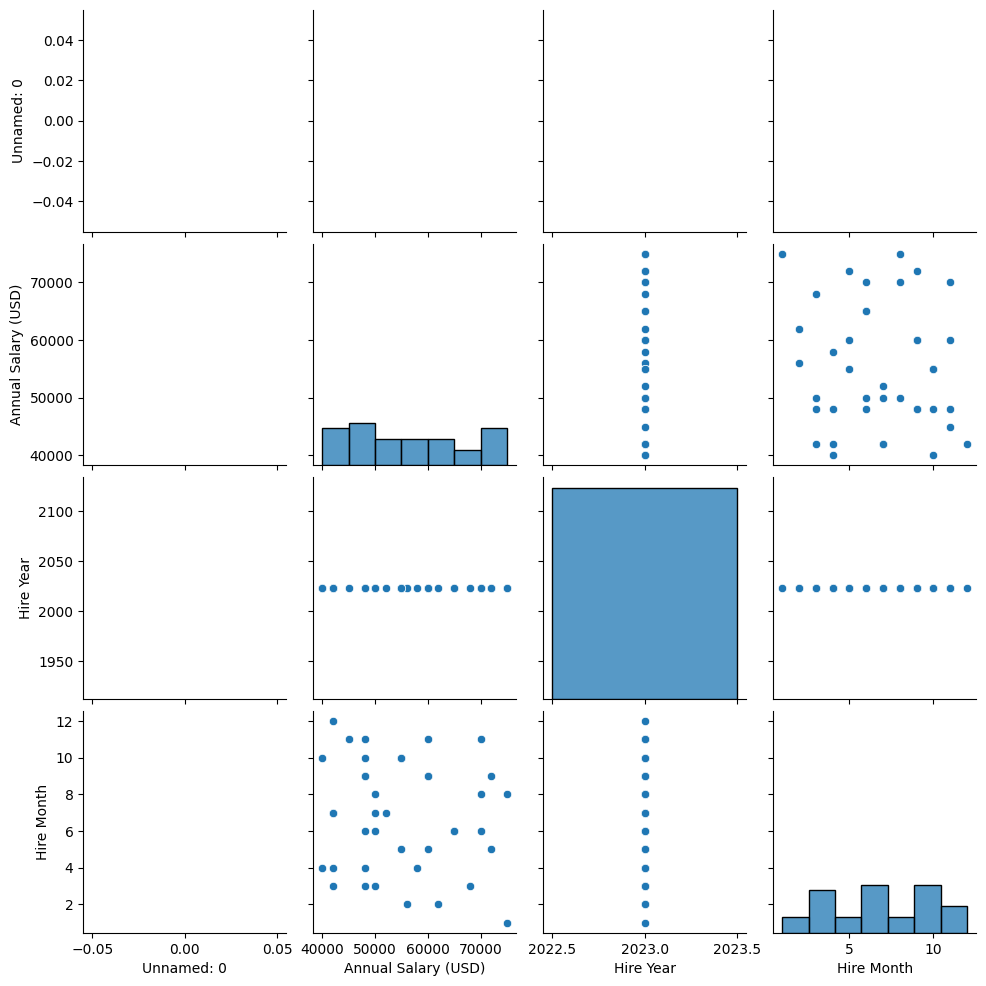

In [23]:
sns.pairplot(df_1)
plt.show()

In [24]:
df_1['Designation'].value_counts()

Designation
HR Manager                                1
Marketing Specialist                      1
Senior Financial Analyst                  1
Senior Sales Representative               1
Senior IT Specialist                      1
Assistant Operations Manager              1
Senior Customer Service Representative    1
R&D Technician                            1
Senior Production Supervisor              1
Senior QA Analyst                         1
HR Generalist                             1
Marketing Assistant                       1
Junior Financial Analyst                  1
Sales Coordinator                         1
Junior IT Specialist                      1
Operations Assistant                      1
Customer Service Associate                1
R&D Assistant                             1
Production Assistant                      1
Marketing Coordinator                     1
HR Assistant                              1
QA Manager                                1
QA Analyst          

All the employees work at different designations, as the above output/result shows.

/tmp/ipykernel_36/2140527555.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Hire Month', y='Annual Salary (USD)', data=df_1, estimator="mean", ci=None)


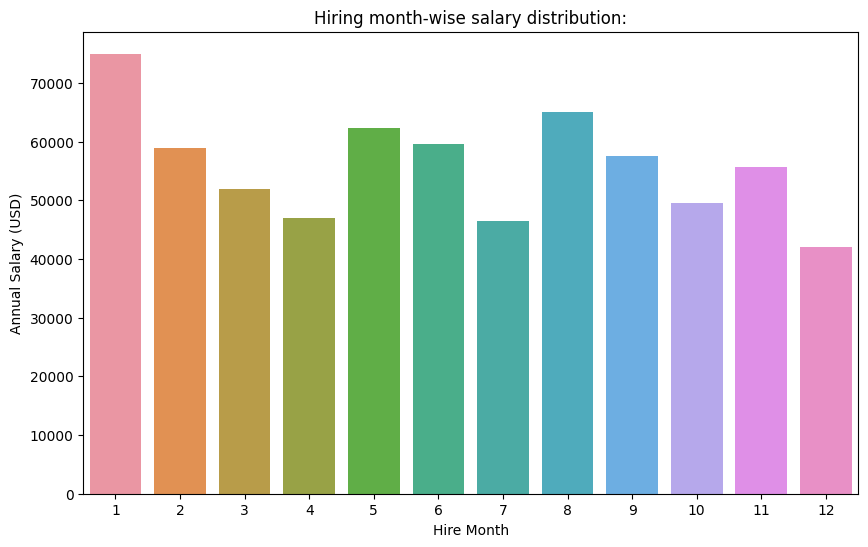

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x='Hire Month', y='Annual Salary (USD)', data=df_1, estimator="mean", ci=None)
plt.title("Hiring month-wise salary distribution:")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


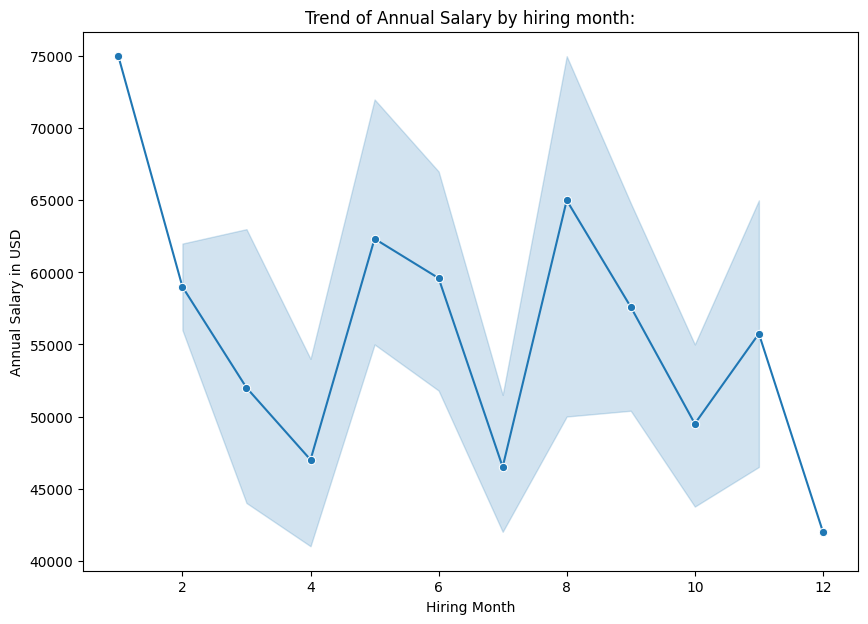

In [26]:
plt.figure(figsize=(10,7))
sns.lineplot(data=df_1, x='Hire Month', y='Annual Salary (USD)', marker='o')
plt.title('Trend of Annual Salary by hiring month:')
plt.xlabel('Hiring Month')
plt.ylabel('Annual Salary in USD')
plt.show()

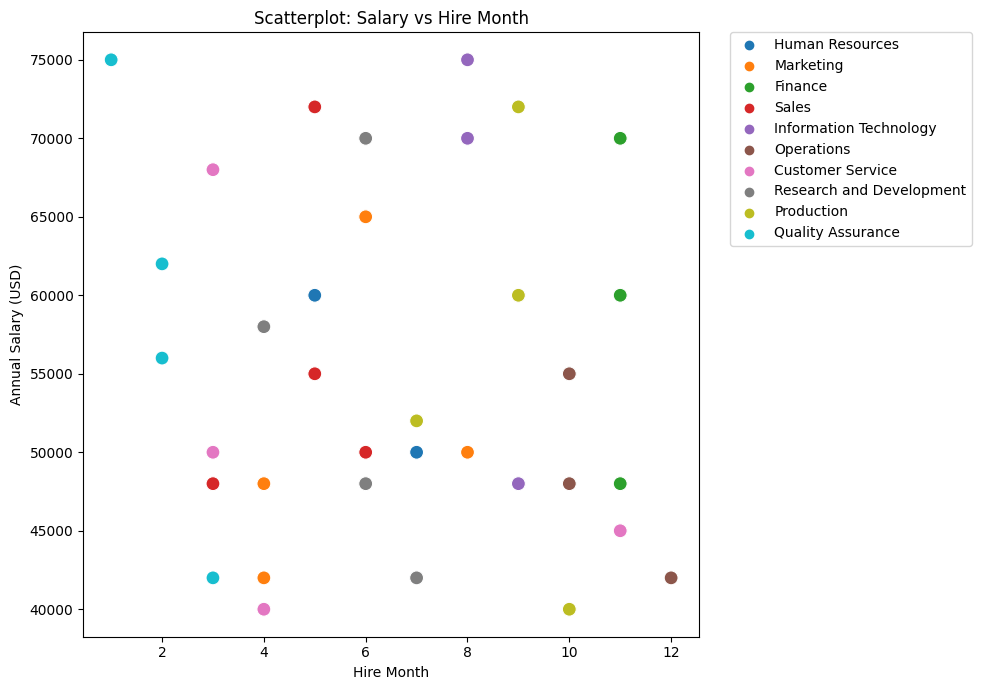

In [27]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_1, x='Hire Month', y='Annual Salary (USD)', hue='Department',s=100)
plt.title('Scatterplot: Salary vs Hire Month')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

bbox_to_anchor pushes the legend to the right of the plot.

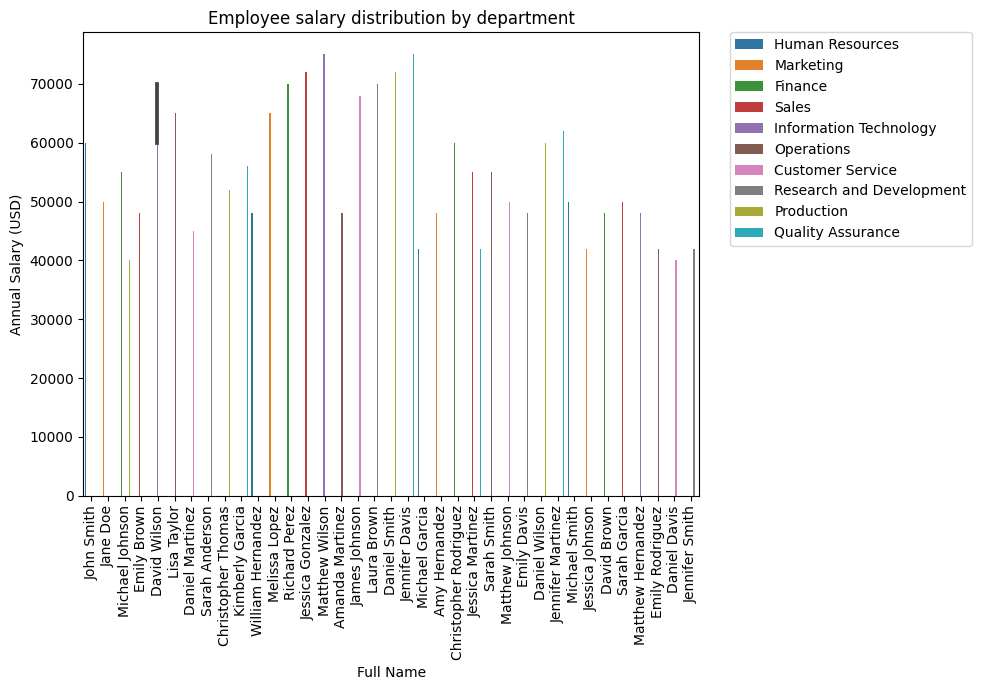

In [28]:
plt.figure(figsize=(10,7))
sns.barplot(x='Full Name', y='Annual Salary (USD)', data=df_1, hue='Department')
plt.xticks(rotation=90)
plt.title("Employee salary distribution by department")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()

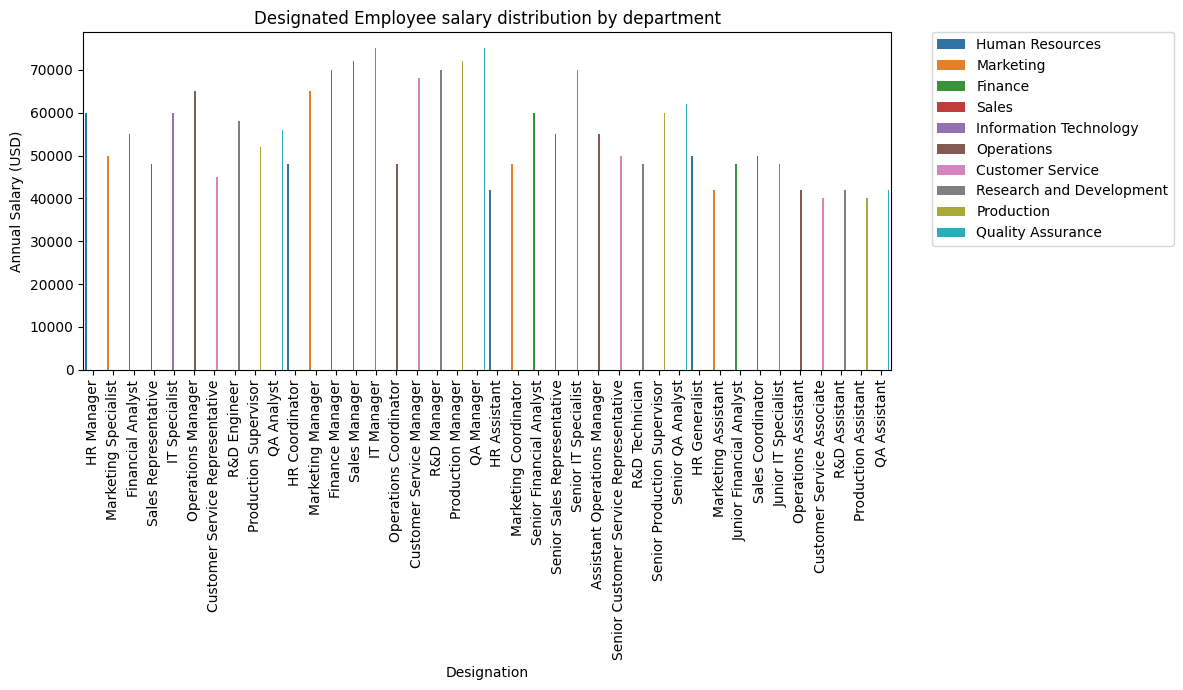

In [29]:
plt.figure(figsize=(12,7))
sns.barplot(x='Designation', y='Annual Salary (USD)', data=df_1, hue='Department')
plt.xticks(rotation=90)
plt.title("Designated Employee salary distribution by department")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0.)

plt.tight_layout()
plt.show()

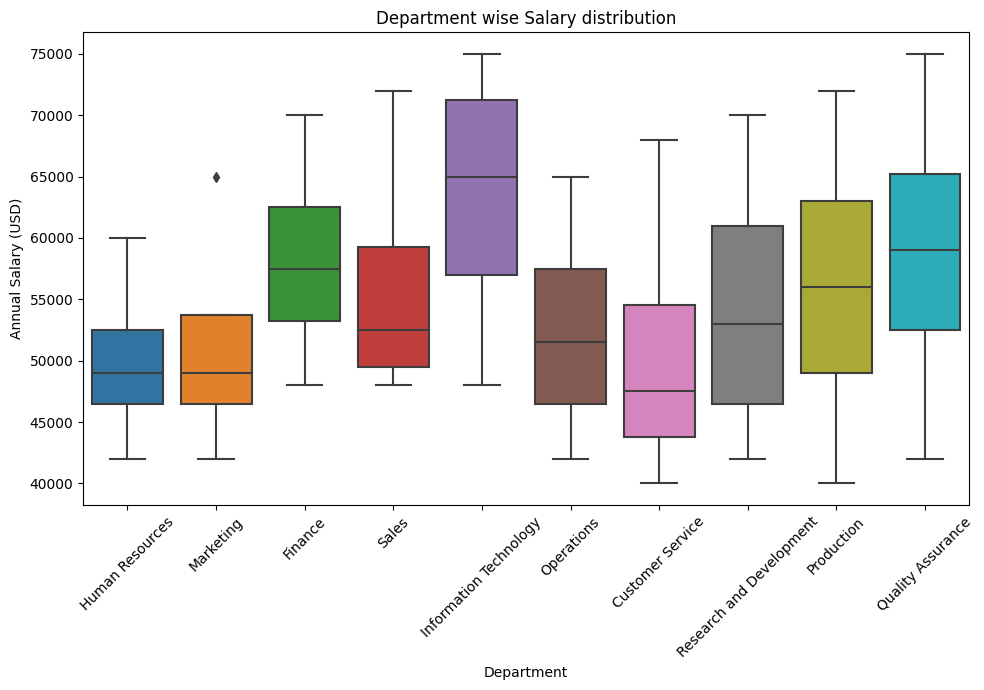

In [30]:
plt.figure(figsize=(10,7))
sns.boxplot(data=df_1, x='Department', y='Annual Salary (USD)')
plt.title('Department wise Salary distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Here we can clearly see that there exist an outlier in the Marketing dept. Annual Salary which also tends to swell the Mean or Avg. Salary for the dept.

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


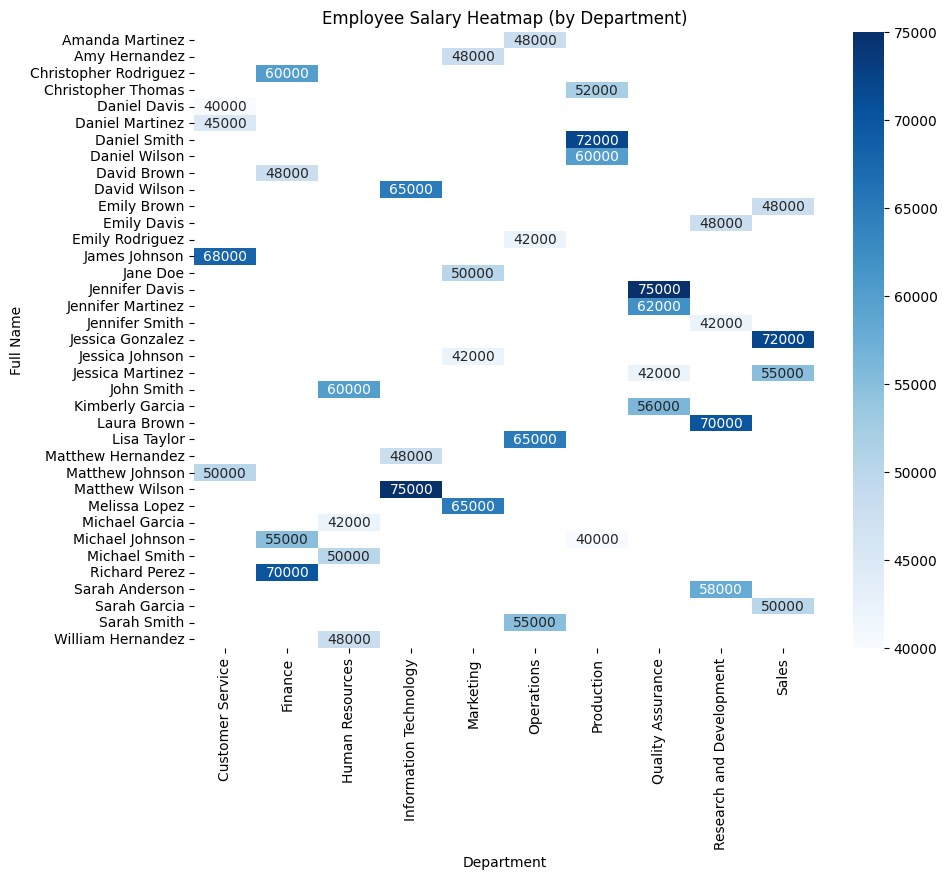

In [31]:
pivot = df.pivot_table(
    index="Full Name", 
    columns="Department", 
    values="Annual Salary (USD)", 
    aggfunc="mean"
)

plt.figure(figsize=(10,8))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="Blues")
plt.title("Employee Salary Heatmap (by Department)")
plt.show()

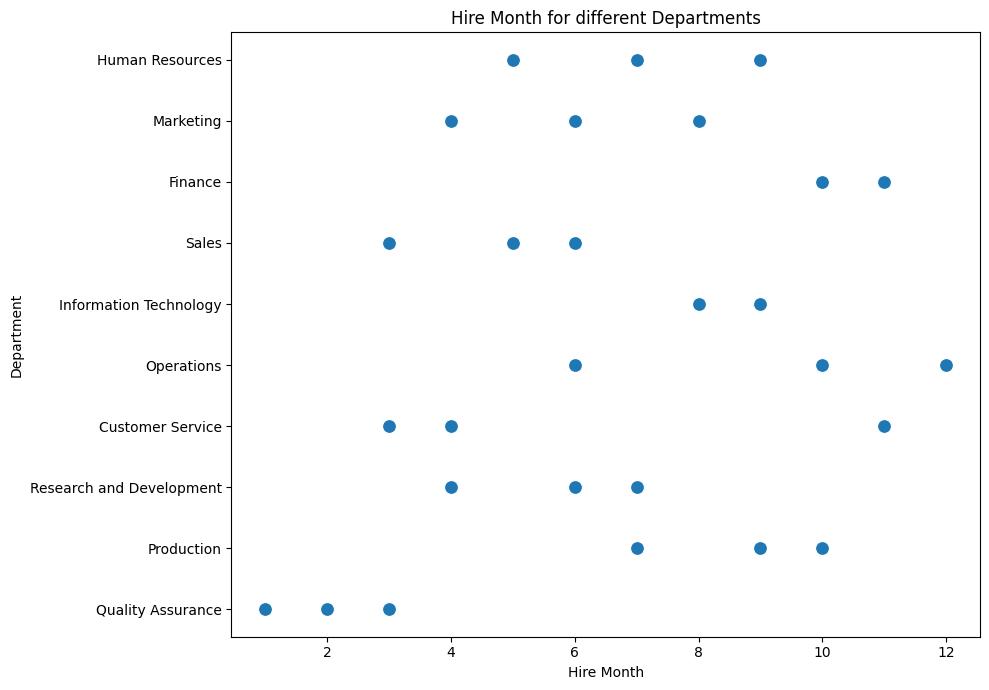

In [32]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=df_1, x='Hire Month', y='Department',s=100)
plt.title('Hire Month for different Departments')
#plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', borderaxespad=0.)
plt.tight_layout()
plt.show()

Here we can infer that:

1. Finance department recruits newer employees in the months of October and November while the Information Technology (IT) team generally hires in the months of August and September.

2. Only Finance and IT are two such departments which recruit only in the 2 months, while all the other 8 hire new employees for 3 months at least.

3. From the above plot, we can also say that in June, maximum departments are on the hunt for newer employees while the least in January, February and December with one each.

In [33]:
df_1['Hire Month'].value_counts()

Hire Month
9     5
6     5
10    4
3     4
11    4
4     4
7     4
5     3
8     3
2     2
1     1
12    1
Name: count, dtype: int64

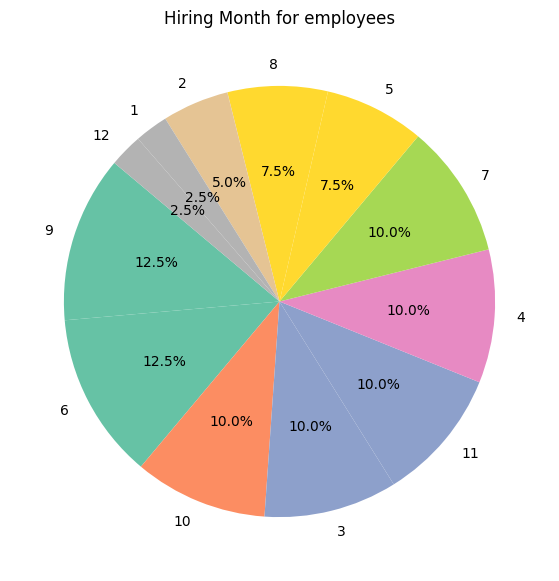

In [34]:
plt.figure(figsize=(10,7))
df_1['Hire Month'].value_counts().plot.pie(autopct="%1.1f%%", startangle=140, cmap="Set2")
plt.title("Hiring Month for employees")
plt.ylabel("")
plt.show()


June and September is when the highest hiring happens, closely followed by March, April, July, October and November while in January and December, the hiring drops sharply and only one department is on the look for new employees in these 2 months. 